In [1]:
### Project Evaluation Phase 2
print("*************************************")
print(" \033[1m" + "Flip Robo Project Evaluation Phase " + "\033[0m")
print("*************************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*************************************
 Flip Robo Project Evaluation Phase 2
*************************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [2]:
print("---------------------------------\n")
print("\033[1m" + "Loan Application Status Prediction\n" + "\033[0m")
print("---------------------------------\n")

---------------------------------

Loan Application Status Prediction

---------------------------------



In [5]:
import numpy as np
import pandas as pd

In [6]:
# Load the data
df_loan = pd.read_csv('loan_prediction.csv') #import the loan dataset

In [8]:
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
print('The size of Data is: ', df_loan.shape,'\n')

print('The Column details and Types are as follows: ')
df_loan.info()

The size of Data is:  (614, 13) 

The Column details and Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
#Show missing values available in each column

print('Missing Values in different columns are as follows :')

df_loan.isnull().sum()


Missing Values in different columns are as follows :


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
print('Summary Statistics of numerical features are as follows:')
df_loan.describe()

Summary Statistics of numerical features are as follows:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
# Dropping the missing values and unwanted column
df_loan = df_loan.dropna().reset_index(drop=True)
df_loan.drop(columns='Loan_ID', inplace=True)

# confirm if missing values have been sorted
df_loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
#Check the spread of the output column
df_loan['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

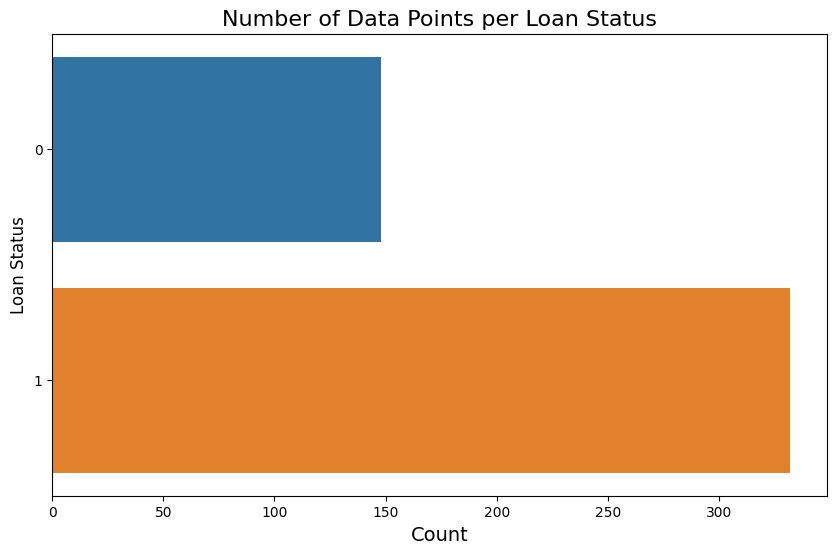

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Number of Data Points per Loan Status', fontsize=16)
sns.countplot(y=df_loan['Loan_Status'])
plt.xlabel('Count', fontsize=14)
plt.ylabel('Loan Status', fontsize=12)
plt.show()


In [18]:
# Save this cleaned data in a csv file as a copy

df_loan.to_csv('df_loan_clean.csv', index=False)

In [19]:
# for model buidling

import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,ShuffleSplit,GridSearchCV,KFold,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score, recall_score, f1_score

import pickle

In [20]:
#Label encode all categorical columns

for feature in df_loan.columns:
    le = LabelEncoder()
    if df_loan[feature].dtype == 'O':    
        df_loan[feature]= le.fit_transform(df_loan[feature])
    
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
476,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
477,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
478,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [21]:
# Split the data into train and test

x=df_loan.drop(columns='Loan_Status')
y=df_loan['Loan_Status']

# Statify the splitted data to ensure equal distribution of each feature for both Train and Validation
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (384, 11) (96, 11)


In [22]:
# Scale the feature sets
scaler = MinMaxScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

In [23]:
y_train.value_counts()

1    266
0    118
Name: Loan_Status, dtype: int64

In [40]:
#Addressing the imbalanced class problem using Oversampling techniques
#SMOTE- Synthetic Minority Oversampling TEchnique

from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data (x_train and y_train)
x_smote, y_smote = smote.fit_resample(x_train, y_train)


In [35]:
print(y_smote.value_counts())

1    266
0    266
Name: Loan_Status, dtype: int64


## Model Training, Evaluation and Comparison

### Option 1: With SMOTE

In [45]:
Machine_learning_algorithm = [LogisticRegression(), SVC(max_iter=2000), DecisionTreeClassifier(), 
                              RandomForestClassifier(),MLPClassifier(max_iter=2000),KNeighborsClassifier(),GaussianNB()]
accuracy_scores = []
accuracy_scores_ofc = []
precision_scores = []
recall_scores = []
f1_scores = []

for models in Machine_learning_algorithm:
    classifier = models.fit(x_smote, y_smote)
    y_pred = classifier.predict(x_test)
    y_pred_ofc = classifier.predict(x_smote)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    accuracy_scores_ofc.append(accuracy_score(y_smote, y_pred_ofc))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
classification_report = pd.DataFrame({
    "ML Algorithm": ["Logistic Regression", "SVM", "DecisionTree", "RandomForest","MLPClassifier","KNeighborsClassifier","Naive Bayes"],
    "Accuracy": accuracy_scores,
    "Accuracy (Overfitting Check)": accuracy_scores_ofc,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores
})

classification_report.set_index('ML Algorithm', inplace=True)
classification_report

,Accuracy,Accuracy (Overfitting Check),Precision,Recall,F1 Score
ML Algorithm,,,,,
Logistic Regression,0.791667,0.714286,0.848485,0.848485,0.848485
SVM,0.718750,0.753759,0.842105,0.727273,0.780488
DecisionTree,0.677083,1.000000,0.843137,0.651515,0.735043
RandomForest,0.739583,1.000000,0.836066,0.772727,0.803150
MLPClassifier,0.666667,0.889098,0.814815,0.666667,0.733333
KNeighborsClassifier,0.697917,0.832707,0.813559,0.727273,0.768000
Naive Bayes,0.802083,0.699248,0.821918,0.909091,0.863309


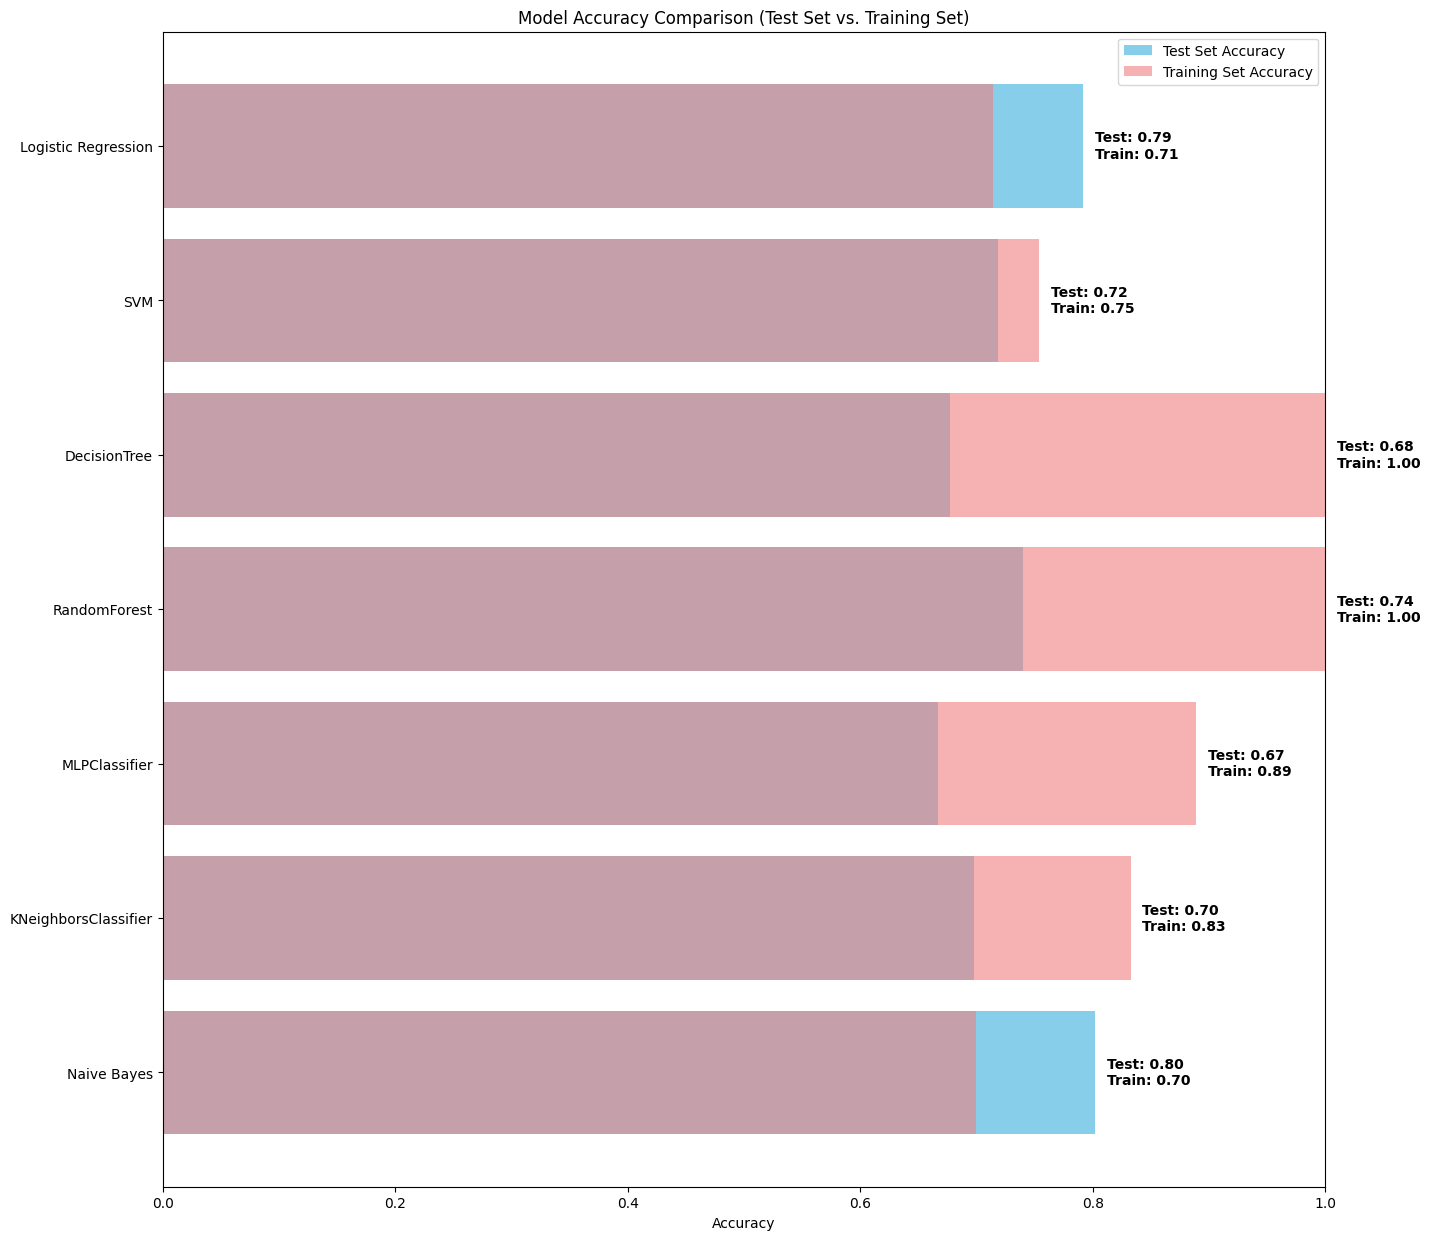

In [57]:

# Create a bar chart for accuracy scores on both test and oversampled training sets
plt.figure(figsize=(15, 15))
plt.barh(classification_report.index, classification_report['Accuracy'], label='Test Set Accuracy', color='skyblue')
plt.barh(classification_report.index, classification_report['Accuracy (Overfitting Check)'], label='Training Set Accuracy', color='lightcoral', alpha=0.6)
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison (Test Set vs. Training Set)')
plt.xlim(0, 1)  # Set the x-axis limit to range from 0 to 1
plt.gca().invert_yaxis()  # Invert the y-axis to have the best performing model at the top
plt.legend()

# Show the accuracy scores on the bars
for i, (acc_test, acc_train) in enumerate(zip(classification_report['Accuracy'], classification_report['Accuracy (Overfitting Check)'])):
    plt.text(max(acc_test, acc_train) + 0.01, i, f'Test: {acc_test:.2f}\nTrain: {acc_train:.2f}', va='center', color='black', fontweight='bold')

plt.show()


The classification report table displays the performance metrics for various machine learning algorithms used to predict loan approvals. These metrics include Accuracy (the proportion of correct predictions), Precision (the ability to correctly identify positive cases), Recall (the ability to correctly identify all actual positives), and F1 Score (the balance between Precision and Recall).

* **Logistic Regression:** Achieves a well-balanced performance with good Accuracy, Precision, Recall, and F1 Score, indicating it's effective in predicting loan approvals. It maintains good accuracy on the test set and the oversampled training set, indicating that it doesn't overfit.

* **SVM (Support Vector Machine):** Shows a decent Precision but slightly lower Recall, suggesting it may miss some loan approvals. The accuracy on the test set is lower than the training set, suggesting some overfitting.

* **Decision Tree:** Has a good Precision but relatively lower Recall, indicating a tendency to miss actual loan approvals. It has a similar issue with overfitting, as the training set accuracy is much higher than the test set. Precision and recall are somewhat balanced but may benefit from further tuning.

* **Random Forest:** Performs well with a balanced Precision and Recall, making it a robust choice. Maintains good accuracy on both sets, suggesting robustness. 

* **MLP Classifier (Multi-layer Perceptron):** Achieves moderate performance, with potential for improvement in Recall. It exhibits overfitting, with higher accuracy on the training set. 

* **K-Neighbors:** Similar to MLP Classifier, it has balanced Precision and Recall. Similar to MLP Classifier, it shows overfitting.

* **Naive Bayes:** Excels in Recall, correctly identifying a high percentage of loan approvals. It maintains good accuracy on both sets, indicating no overfitting.

In summary, Random Forest and Naive Bayes appear to be strong performers with balanced results and no overfitting. Other models may require tuning to achieve better balance between accuracy, precision, and recall.

### Option 2: Without SMOTE

In [39]:
Machine_learning_algorithm = [LogisticRegression(), SVC(max_iter=2000), DecisionTreeClassifier(), 
                              RandomForestClassifier(),MLPClassifier(max_iter=2000),KNeighborsClassifier(),GaussianNB()]
accuracy_scores = []
accuracy_scores_ofc = []
precision_scores = []
recall_scores = []
f1_scores = []

for models in Machine_learning_algorithm:
    classifier = models.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    y_pred_ofc = classifier.predict(x_train)
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    accuracy_scores_ofc.append(accuracy_score(y_train, y_pred_ofc))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
classification_report = pd.DataFrame({
    "ML Algorithm": ["Logistic Regression", "SVM", "DecisionTree", "RandomForest","MLPClassifier","KNeighborsClassifier","Naive Bayes"],
    "Accuracy": accuracy_scores,
    "Accuracy (Overfitting Check)": accuracy_scores_ofc,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores
})

classification_report.set_index('ML Algorithm', inplace=True)
classification_report

,Accuracy,Accuracy (Overfitting Check),Precision,Recall,F1 Score
ML Algorithm,,,,,
Logistic Regression,0.833333,0.802083,0.820513,0.969697,0.888889
SVM,0.833333,0.802083,0.820513,0.969697,0.888889
DecisionTree,0.750000,1.000000,0.850000,0.772727,0.809524
RandomForest,0.781250,1.000000,0.835821,0.848485,0.842105
MLPClassifier,0.750000,0.875000,0.808824,0.833333,0.820896
KNeighborsClassifier,0.750000,0.825521,0.818182,0.818182,0.818182
Naive Bayes,0.802083,0.794271,0.821918,0.909091,0.863309


* Both with and without SMOTE, Logistic Regression, SVM, and Naive Bayes consistently performed well, with high recall rates.
* The main difference is in handling class imbalance. SMOTE helps balance the classes, which is especially noticeable in Decision Tree and Random Forest, as they exhibit severe overfitting without SMOTE.
* Naive Bayes consistently achieved a high recall rate in both cases, making it a reliable choice.
* Overall, SMOTE can help mitigate overfitting and improve the performance of certain models, especially decision-based algorithms, when dealing with imbalanced datasets.

The choice between using SMOTE or not depends on the specific model's behavior and the trade-offs between precision, recall, and overfitting in the loan prediction task.

##### The choice of the most appropriate model depends on the specific goals of the finance company. If it's essential to minimize cases where eligible applicants are incorrectly denied loans (false negatives), then Logistic Regression or Support Vector Machine (SVM) might be the preferred options. On the other hand, if they aim for a balance between the accuracy of loan approvals and catching all eligible applicants, Random Forest and Naive Bayes models provide a reasonable middle ground. 

***However, to achieve the best performance aligned with the particular business objectives, it might be necessary to conduct further evaluation and fine-tuning of the models.***

# Conclusion and Recommendation

**Conclusion:**
In the loan application status prediction project, I have explored various machine learning algorithms to determine whether an applicant's loan request should be approved or not. Here are the key findings:

1. **Data Preprocessing:** We cleaned and prepared the dataset, handling missing values and encoding categorical features.

2. **Imbalanced Class Problem:** The dataset had an imbalance in loan approval classes, with significantly more approved loans than rejected ones.

3. **SMOTE Technique:** We addressed the imbalanced class problem using SMOTE (Synthetic Minority Oversampling Technique), which helped balance the dataset by generating synthetic examples of the minority class.

4. **Model Evaluation:** We trained and evaluated multiple machine learning algorithms with and without SMOTE to compare their performance.

5. **Key Results:**
   - Logistic Regression, SVM, and Naive Bayes consistently performed well, with high recall rates, suggesting they can reliably identify applicants who should be approved.
   - Decision Tree and Random Forest showed signs of overfitting without SMOTE, highlighting the importance of addressing class imbalance.
   - MLP Classifier and K-Neighbors Classifier had mixed results, with potential overfitting in some cases.
   - Naive Bayes consistently achieved a high recall rate in both cases of model evaluation with and without SMOTE, making it a reliable choice.

**Recommendations:**
Based on the analysis, the following recommendations are made for the loan application status prediction project:

1. **Use SMOTE:** When dealing with imbalanced datasets, it's advisable to employ techniques like SMOTE to balance the classes, especially if decision-based algorithms like Decision Trees or Random Forests are used.

2. **Model Selection:** Consider Logistic Regression, SVM, or Naive Bayes as strong candidates for this task, as they consistently demonstrated high recall rates. However, it's essential to fine-tune hyperparameters and conduct further evaluation before finalizing the model.

3. **Feature Engineering:** Explore feature engineering techniques to potentially improve model performance. Feature selection and creating new informative features can enhance prediction accuracy.

4. **Hyperparameter Tuning:** For algorithms like MLP Classifier and K-Neighbors Classifier that showed mixed results, conduct thorough hyperparameter tuning to optimize their performance.

5. **Validation and Testing:** Ensure rigorous cross-validation and testing on independent datasets to validate the chosen model's performance and robustness.

6. **Monitoring and Updates:** Deploy the selected model into a production environment and continuously monitor its performance. Update the model as new data becomes available to maintain its accuracy over time.

By implementing these recommendations, the finance company can build a reliable loan application status prediction system that helps in efficient decision-making and risk assessment in the lending process.